<b><h1>Bellman-Ford</h1></b>
<p align="justify">Δίνεται το παρακάτω σχήμα</p>
<img src="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab7/bellman-topology.png"></img>

<b><h3>Ερωτήσεις</h3></b>
<ul>
<li>1. Να περιγράψετε, συνοπτικά, τη λειτουργία του αλγορίθμου <i>Bellman-Ford</i>.</li>
<li>2. Να εφαρμόσετε τον αλγόριθμο <i>Bellman-Ford</i> στο γράφο του παραπάνω σχήματος για τις ακμές που συμβολίζονται με μαύρο χρώμα και συνεχή γραμμή. Ως πηγή του αλγορίθμου να θεωρήσετε το <b>AS #2</b>. Ποιο είναι το συνολικό κόστος της διαδρομής από το <b>AS #2</b> στο <b>AS #11</b>; Ποιο είναι το μονοπάτι του δέντρου <i>Bellman-Ford</i> από το <b>AS #2</b> στο <b>AS #11</b>;</li>
<li>3. Το <b>AS #2</b> εξετάζει την προσθήκη μιας ζεύξης είτε με το <b>AS #4</b> ή με το <b>AS #1</b>. Οι ζεύξεις αυτές φαίνονται στον παραπάνω γράφο με μαύρες διακεκομμένες γραμμές. Γιατί πιστεύετε ότι χρειάζεται το <b>AS #2</b> την επιπλέον αυτή ζεύξη; Ποια από τις παραπάνω ζεύξεις θα πρέπει να προτιμήσει το <b>AS #2</b> για να είναι μικρότερο το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11;</b></li>
<li>4. Προσθέστε την κατάλληλη ζεύξη, όπως την προσδιορίσατε στο προηγούμενο ερώτημα. Έστω ότι η ζεύξη <b>AS #2</b> – <b>AS #3</b> παθαίνει μια βλάβη. Ποιο είναι, τώρα, το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11</b>; Πόσο επιβαρύνθηκε σε σχέση με το δεύτερο ερώτημα;</li>
<li>5. Έστω ότι αποκαθίσταται η βλάβη. Το <b>AS #12</b> προσφέρεται να ενώσει τα <b>AS #10</b> και <b>AS #11</b> απ’ ευθείας στο <b>AS #3</b>. Το <b>AS #12</b> μαζί με τις νέες ακμές που θα προστεθούν φαίνονται με κόκκινο χρώμα στον παραπάνω γράφο. Πόσο θα βελτιωθεί το συνολικό κόστος <b>AS #2</b> – <b>AS #11</b>; Το συγκεκριμένο ερώτημα προσπαθεί να προσομοιώσει τη λειτουργία του GR-IX. Τι είναι το GR-IX (<a href="https://gr-ix.gr">site</a>) και ποιος είναι ο ρόλος του για το ελληνικό Internet;</li>
</ul>
<br>
<i><p align="justify">Για την επιλύση της άσκησης θα χρησιμοποιήσετε τη βιβλιοθήκη της Python <a href="https://pypi.org/project/bellmanford/">bellmanford</a></p></i>

## Απαντήσεις

1. Ο αλγόριθμος Bellman-Ford υπολογίζει την πιο συντομη διαδρομη (δενδρα ελαχίστων δρόμων) απο την κορυφή ενός γράφου με βάρη προς όλες τις άλλες κορυφές. Τυχαια επιλέγεται μια κορυφή και αρχικοποιείται στο 0 ενώ όλες οι άλλες στο άπειρο. Σε κάθε iteration n=1,2... και για όλα τα i ανανεώνουμε ασύγχρονα της εκτιμήσεις ελαχίστου κόστους από την παρούσα κατάσταση προς την τελική κατάσταση με τις εκτιμήσεις σύμφωνα με τον Δυναμικό Προγραμματισμό για όλους τους άμεσους γείτονες της αρχικά επιλεγμενης κορυφής. Σε κάθε επανάληωη ο μικρότερος αριθμός διαδρομών σε σχέση με το μέγιστο μήκος των ακμών που συνδέουν τις κορυφές υπολογίζεται. Η μεγαλύτερη δυνατή διαδρομή χωρίς κύκλο, αν με Ν συμβολισουμε τον  αριθμο των ακμών, θα επισκεφτούμε το πολύ Ν-1 ακμές όσες και οι επαναλήψεις ώστε να βρεθεί η βέλτιστη διαδρομή. Ο αλγόριθμος σταματάει όταν προσδιοριστεί ο βέλτιστος δρόμος. 

In [36]:
import networkx as net

Graph = net.Graph()
Nodes=['AS_1','AS_2','AS_3','AS_4','AS_5','AS_6','AS_7','AS_8','AS_9','AS_10','AS_11','AS_13']

Graph.add_nodes_from(Nodes)

# Add the Edge weights (διαδρομες)
Graph.add_edge('AS_1', 'AS_3', weight =4)
Graph.add_edge('AS_2', 'AS_3', weight =4)
Graph.add_edge('AS_3', 'AS_5', weight =2)
Graph.add_edge('AS_4', 'AS_5', weight =20)
Graph.add_edge('AS_5', 'AS_6', weight =5)
Graph.add_edge('AS_5', 'AS_7', weight =2)
Graph.add_edge('AS_6', 'AS_7', weight =4)
Graph.add_edge('AS_7', 'AS_8', weight =3)
Graph.add_edge('AS_8', 'AS_9', weight =7)
Graph.add_edge('AS_8', 'AS_13', weight =4)
Graph.add_edge('AS_9', 'AS_10', weight =3)
Graph.add_edge('AS_9', 'AS_11', weight =4)
Graph.add_edge('AS_9', 'AS_13', weight =5)


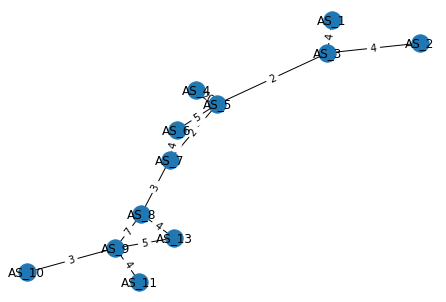

In [37]:

def plotBF_Graph(G):
    # Node Positions 
    node_p = net.spring_layout(G)
    
    # Plot the Graph 
    net.draw(G, node_p, with_labels=True )
    
    # Add the Edges 
    #for i in Graph.edges:
        #labels = G.get_edge_data(i)['weight']
    labels = {e: G.get_edge_data(*e)['weight'] for e in G.edges}    
    # Plot the Edges Labels 
    net.draw_networkx_edge_labels(G, node_p, edge_labels = labels)
    
# Plot the above  BF figure    
plotBF_Graph(Graph)

In [38]:
#!pip install bellmanford

import bellmanford as bf



results = bf.bellman_ford(Graph, source='AS_2',target= 'AS_11')

print('Total Cost:', results[0])
print('Followed  path:', results[1])


Total Cost: 22
Followed  path: ['AS_2', 'AS_3', 'AS_5', 'AS_7', 'AS_8', 'AS_9', 'AS_11']


## 2.
**Κόστος διαδρομής:** 22 

**Διαδρομή:** 'AS_2' - 'AS_3' - 'AS_5' - 'AS_7' - 'AS_8' - 'AS_9' - 'AS_11'


## 3. 

H επιπλέον ζεύξη στο ΑS_2 χρειάζεται σε περίπτωση αστοχίας στην AS_3 ετσι 'ωστε να μήν απομονωθεί απο τον τον υπόλοιπο γράφο.
Για την επιλογή της ζέυξης μεταξύ ΑS_1 και AS_4 θα πρέπει να εξετάσουμε το συνολικό κόστος μέχρι το ΑS_11 και όχι μονάχα μεταξύ ΑS_2 - AS_1 και AS_2-AS_4. 
Aν και μεγαλύτερο το κόστος μέσω του ΑS_1 αποτελεί συνολικά καλύτερη επιλογή από ότι αυτή του AS_4 καθώς το υπόλοιπο κομμάτι διαδρομής μετά την άφιξη στο AS_5 είναι κοινό. Άρα επιλέγουμε το AS_1 έναντι στο AS_4 μιας και συνολικά έχουμε AS_2 - AS_1 - AS_5 = 16 έναντι ΑS_2 - AS_4 - AS_5 = 24

## 4.

In [39]:
Graph2 = Graph

New Cost: 32
New path followed: ['AS_2', 'AS_1', 'AS_3', 'AS_5', 'AS_7', 'AS_8', 'AS_9', 'AS_11']
Difference in Cost: 45.45454545454545 %


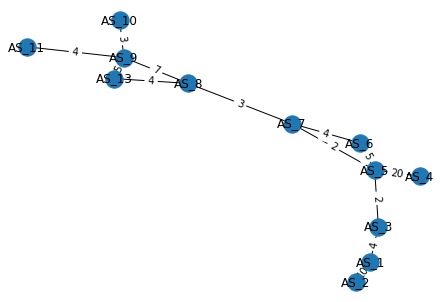

In [40]:
Graph2.remove_edge('AS_2', 'AS_3')
Graph2.add_edge('AS_2', 'AS_1', weight = 10)

plotBF_Graph(Graph2)

results2 = bf.bellman_ford(Graph2, source= 'AS_2',target='AS_11')
cost_dif2_1 = ((results2[0] - results[0])/results[0]) 
print('New Cost:', results2[0])
print('New path followed:', results2[1])#

print('Difference in Cost:', cost_dif2_1*100, '%')

Παρατηρούμε σημαντική αύξηση του κόστους με την προσθήκη του νέου κόμβου της ΄τάξης του 45%

## 5. 


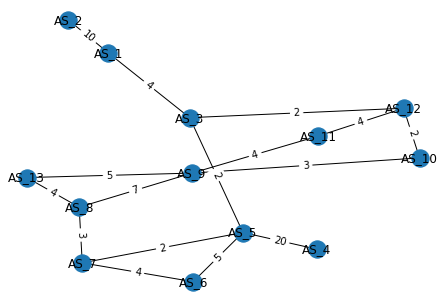

In [41]:
Graph.add_node('AS_12')
Graph.add_edge('AS_3', 'AS_12', weight=2)
Graph.add_edge('AS_10', 'AS_12', weight=2)
Graph.add_edge('AS_11', 'AS_12', weight=4)

plotBF_Graph(Graph)


In [45]:
results3 = bf.bellman_ford(Graph, source='AS_2', target='AS_11')
cost_dif3_2 = ((results3[0] - results2[0])/results2[0]) 
cost_dif3_1 = ((results3[0] - results[0])/results[0]) 
print('New Cost:', results3[0])
print('New path followed:', results3[1])#

print('Difference in Cost 3,2:', cost_dif3_2*100, '%')
print('Difference in Cost 3,1:', cost_dif3_1*100, '%')

New Cost: 20
New path followed: ['AS_2', 'AS_1', 'AS_3', 'AS_12', 'AS_11']
Difference in Cost 3,2: -37.5 %
Difference in Cost 3,1: -9.090909090909092 %


Το κόστος με την προσθήκη του νέου κόμβου μειώθηκε σημαντικά σε σχέση με το προηγούμενο βήμα της τάξης του 37.5%. 
Ενώ σε σχέση με το αρχικό κόστος αυξήθηκε.

Το GR-IX είναι ένα ουδέτερο και ανεξάρτητο Internet Exchange, αποστολή του οποίου είναι η διευκόλυνση της ανταλλαγής κίνησης διαδικτύου (IP) και η επιτάχυνση της ανάπτυξης του Ελληνικού Internet.

Το GR-IX αποτελεί σημαντική εθνική υποδομή καθώς διασυνδέει τις μεγαλύτερες εταιρίες διαδικτύου στην Ελλάδα, όπως πάροχους υπηρεσιών Internet, πάροχους περιεχομένου, πάροχους υπηρεσιών cloud κλπ.

To GR-IX ανήκει στο Εθνικό Δίκτυο Υποδομών Τεχνολογίας και Έρευνας Α.Ε. (ΕΔΥΤΕ Α.Ε.), το οποίο, όντας μια μη κερδοσκοπική εταιρία που ανήκει στο κράτος, εγγυάται την ουδετερότητα και την ανεξαρτησία του Internet Exchange.

Το GR-IX ιδρύθηκε το 2009 ως διάδοχος του Athens Internet Exchange (AIX), το οποίο ήταν σε λειτουργία από το 1999.